# 1.- Importacion de modulos e librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 2.- Carga de Datos


In [ ]:
partidos_qatar2022 = pd.read_csv('https://raw.githubusercontent.com/Ahmed-Eladl/FIFA-World-Cup-Qatar-2022/main/matches_.csv') # es estático y no es necesario
historial_partidos = pd.read_csv('https://raw.githubusercontent.com/Ahmed-Eladl/FIFA-World-Cup-Qatar-2022/main/results.csv') # es estático y no es necesario
ranking_clasificados= pd.read_csv('https://raw.githubusercontent.com/Ahmed-Eladl/FIFA-World-Cup-Qatar-2022/main/rank.csv') # facil de automatizar
valoración_clasificados = pd.read_csv("/content/valoracion_clasificados.csv")

In [ ]:
valoración_mercado.head()

pais   valor
0   England  1320.0
1    France  1080.0
2    Brazil  1010.0
3   Germany   836.5
4  Portugal   765.0

# 3.- Analisis Exploratorio de Datos


## Verificar valores nulos

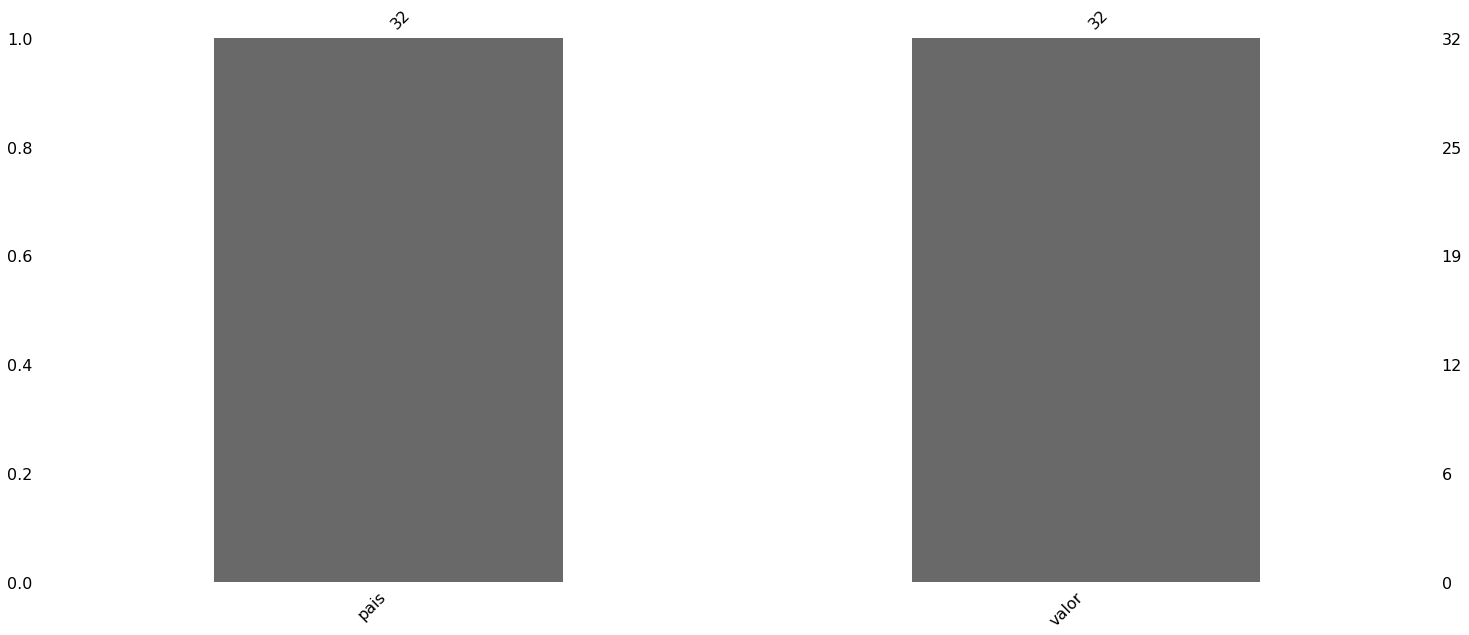

In [ ]:
import missingno as msno
msno.bar(valoración_clasificados)

## ponderación del valor en el mercado y ranking de los clasificados.

1. Valor en el mercado: 30%
2. Ranking Fifa: 70%

In [ ]:
def update_points(team,points):
  if team in list(valoración_mercado["pais"]):
    valor=float(list(valoración_mercado.loc[valoración_mercado["pais"]==team]["valor"])[0])
    new_point=points*0.7+valor*0.3
    return new_point
  else:
    return 0

In [ ]:
ranking_clasificados["Points"]=ranking_clasificados.apply(lambda x:  update_points(x["Team"],x["Points"]), axis=1)

In [ ]:
ranking_clasificados.sort_values(by="Points",ascending=False)

RK             Team    Points
4      5          England  1629.197
0      1           Brazil  1585.883
2      3           France  1576.895
3      4        Argentina  1420.691
6      7            Spain  1418.433
..   ...              ...       ...
91    92          Armenia     0.000
92    93          Belarus     0.000
93    94       Luxembourg     0.000
94    95  Kyrgyz Republic     0.000
210  211       San Marino     0.000

[211 rows x 3 columns]

In [ ]:
ranking_clasificados.head()

RK       Team    Points
0   1     Brazil  1585.883
1   2    Belgium  1380.300
2   3     France  1576.895
3   4  Argentina  1420.691
4   5    England  1629.197

##3.1 Renombrar columnas al español

In [ ]:
partidos_qatar2022=partidos_qatar2022.rename(columns={"Round":"ronda","Group":"grupo","Date":"fecha","Home":"local","Away":"visitante"," Time (ET)":"hora","Staduim":"estadio"})
historial_partidos=historial_partidos.rename(columns={"date":"fecha","home_team":"equipo_local","away_team":"equipo_visitante","home_score":"goles_local","away_score":"goles_visita","tournament":"torneo","city":"ciudad","country":"pais","Staduim":"estadio"})
ranking_clasificados=ranking_clasificados.rename(columns={"RK":"posicion","Team":"equipo","Points":"puntos"})
ranking_clasificados.head()

posicion     equipo    puntos
0         1     Brazil  1585.883
1         2    Belgium  1380.300
2         3     France  1576.895
3         4  Argentina  1420.691
4         5    England  1629.197

In [ ]:
partidos_qatar2022.head(20)

ronda grupo           fecha        local     visitante     hora  \
0      1     A    Mon, Nov. 21      Senegal   Netherlands   5 a.m.   
1      1     A    Mon, Nov. 21        Qatar       Ecuador  11 a.m.   
2      1     B    Mon, Nov. 21      England       IR Iran   8 a.m.   
3      1     B    Mon, Nov. 21          USA         Wales   2 p.m.   
4      1     C   Tues, Nov. 22    Argentina  Saudi Arabia   5 a.m.   
5      1     C   Tues, Nov. 22       Mexico        Poland  11 a.m.   
6      1     D    Tue, Nov. 22      Denmark       Tunisia   8 a.m.   
7      1     D    Tue, Nov. 22       France     Australia   2 p.m.   
8      1     E    Wed, Nov. 23      Germany         Japan   8 a.m.   
9      1     E    Wed, Nov. 23        Spain    Costa Rica  11 a.m.   
10     1     F    Wed, Nov. 23      Morocco       Croatia   5 a.m.   
11     1     F    Wed, Nov. 23      Belgium        Canada   2 p.m.   
12     1     G  Thurs, Nov. 24  Switzerland      Cameroon   5 a.m.   
13     1     G  Thurs, Nov. 24       Brazil        Serbia   2 p.m.   
14     1     H  Thurs, Nov. 24      Uruguay   South Korea   8 a.m.   
15     1     H  Thurs, Nov. 24     Portugal         Ghana  11 a.m.   
16     2     A    Fri, Nov. 25        Qatar       Senegal   8 a.m.   
17     2     A    Fri, Nov. 25  Netherlands       Ecuador  11 a.m.   
18     2     B    Fri, Nov. 25        Wales       IR Iran   5 a.m.   
19     2     B    Fri, Nov. 25      England           USA   2 p.m.   

                   estadio  
0       Al Thumama Stadium  
1          Al Bayt Stadium  
2    Khalifa Int'l Stadium  
3    Ahmad Bin Ali Stadium  
4           Lusail Stadium  
5              Stadium 974  
6   Education City Stadium  
7        Al Janoub Stadium  
8            Khalifa Int'l  
9               Al Thumama  
10                 Al Bayt  
11           Ahmad Bin Ali  
12       Al Janoub Stadium  
13          Lusail Stadium  
14  Education City Stadium  
15             Stadium 974  
16      Al Thumama Stadium  
17   Khalifa Int'l Stadium  
18   Ahmad Bin Ali Stadium  
19         Al Bayt Stadium

##3.2 Definir el ganador del encuentro
Este proceso se realiza teniendo en cuenta los goles anotados por cada equipo

In [ ]:
ganador = []
for i in range (len(historial_partidos['equipo_local'])):
    if historial_partidos ['goles_local'][i] > historial_partidos['goles_visita'][i]:
        ganador.append(historial_partidos['equipo_local'][i])
    elif historial_partidos['goles_local'][i] < historial_partidos ['goles_visita'][i]:
        ganador.append(historial_partidos['equipo_visitante'][i])
    else:
        ganador.append('empate')
historial_partidos['equipo_ganador'] = ganador

In [ ]:
historial_partidos.head()

fecha equipo_local equipo_visitante  goles_local  goles_visita  \
0  1872-11-30     Scotland          England            0             0   
1  1873-03-08      England         Scotland            4             2   
2  1874-03-07     Scotland          England            2             1   
3  1875-03-06      England         Scotland            2             2   
4  1876-03-04     Scotland          England            3             0   

     torneo   ciudad      pais  neutral equipo_ganador  
0  Friendly  Glasgow  Scotland    False         empate  
1  Friendly   London   England    False        England  
2  Friendly  Glasgow  Scotland    False       Scotland  
3  Friendly   London   England    False         empate  
4  Friendly  Glasgow  Scotland    False       Scotland

In [ ]:
#variables cualitativas
variables_cualitativas_historial_partidos= ["equipo_local","equipo_visitante","torneo","ciudad","pais"]
variables_cualitativas_partidos_qatar= ["grupo","fecha","local","visitante","hora","estadio"]
variables_cualitativas_ranking= ["equipo"]
variables_cualitativas_valoracion= ["pais"]

# variables cuantitativas 
variables_cuantitativas_historial_partidos= ["goles_local","goles_visita"]
variables_cuantitativas_partidos_qatar= ["ronda"]
variables_cuantitativas_ranking= ["posicion","puntos"]
variables_ccuantitativas_valoracion= ["valor"]

##3.3 Extraccion del historial de partidos desde 1930

---


¿por qué 1930?: A partir de ese año se empezaron a jugar los mundiales de futbol

In [ ]:
#Creamos un dataframe con todos los partidos jugados por inglaterra, ya sea de local o de visita
df = historial_partidos[(historial_partidos['equipo_local'] == 'England') | (historial_partidos['equipo_visitante'] == 'England')]
England = df.iloc[:]
England.head()


fecha equipo_local equipo_visitante  goles_local  goles_visita  \
0  1872-11-30     Scotland          England            0             0   
1  1873-03-08      England         Scotland            4             2   
2  1874-03-07     Scotland          England            2             1   
3  1875-03-06      England         Scotland            2             2   
4  1876-03-04     Scotland          England            3             0   

     torneo   ciudad      pais  neutral equipo_ganador  
0  Friendly  Glasgow  Scotland    False         empate  
1  Friendly   London   England    False        England  
2  Friendly  Glasgow  Scotland    False       Scotland  
3  Friendly   London   England    False         empate  
4  Friendly  Glasgow  Scotland    False       Scotland

In [ ]:
# Proceso de extracción de los partidos jugados por inglaterra desde 1930
year = []
for row in England['fecha']:
    year.append(int(row[:4]))
England ['anio_partido']= year
England_1930 = England[England.anio_partido >= 1930]
England_1930.count()

fecha               867
equipo_local        867
equipo_visitante    867
goles_local         867
goles_visita        867
torneo              867
ciudad              867
pais                867
neutral             867
equipo_ganador      867
anio_partido        867
dtype: int64

In [ ]:
England_1930.head(9)

fecha      equipo_local  equipo_visitante  goles_local  \
1277  1930-04-05           England          Scotland            5   
1288  1930-05-10           Germany           England            3   
1292  1930-05-14           Austria           England            0   
1353  1930-10-20           England  Northern Ireland            5   
1361  1930-11-22             Wales           England            0   
1382  1931-03-28          Scotland           England            2   
1399  1931-05-14            France           England            5   
1401  1931-05-16           Belgium           England            1   
1447  1931-10-17  Northern Ireland           England            2   

      goles_visita                torneo     ciudad              pais  \
1277             2  British Championship     London           England   
1288             3              Friendly     Berlin           Germany   
1292             0              Friendly     Vienna           Austria   
1353             1  British Championship  Sheffield           England   
1361             4  British Championship    Wrexham             Wales   
1382             0  British Championship    Glasgow          Scotland   
1399             2              Friendly   Colombes            France   
1401             4              Friendly   Brussels           Belgium   
1447             6  British Championship    Belfast  Northern Ireland   

      neutral equipo_ganador  anio_partido  
1277    False        England          1930  
1288    False         empate          1930  
1292    False         empate          1930  
1353    False        England          1930  
1361    False        England          1930  
1382    False       Scotland          1931  
1399    False         France          1931  
1401    False        England          1931  
1447    False        England          1931

###A. Extracción del historial solo de los paises clasificados

In [ ]:
# Filtraremos solo los paises clasificados
equipos_copamundial = ['Senegal', ' Netherlands', 'Qatar', 'Ecuador', 
            'England', 'Iran', 'United States', 'Wales', 
            'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 
            'Denmark', 'Tunisia', 'France', 'Australia', 
            'Germany', 'Japan', 'Spain', 'Costa Rica', 
            'Morocco', 'Croatia', 'Belgium', 'Canada', 
            'Switzerland', 'Cameroon', 'Brazil', 'Serbia', 
            'Uruguay', 'South Korea', 'Portugal', 'Ghana']
df_equipos_local = historial_partidos[historial_partidos['equipo_local'].isin(equipos_copamundial)]
df_equipos_visitantes = historial_partidos[historial_partidos['equipo_visitante'].isin(equipos_copamundial)]
df_equipos= pd.concat((df_equipos_local, df_equipos_visitantes))
df_equipos.drop_duplicates()
df_equipos.count()

fecha               21593
equipo_local        21593
equipo_visitante    21593
goles_local         21593
goles_visita        21593
torneo              21593
ciudad              21593
pais                21593
neutral             21593
equipo_ganador      21593
dtype: int64

In [ ]:
df_equipos

fecha  equipo_local equipo_visitante  goles_local  goles_visita  \
1      1873-03-08       England         Scotland            4             2   
3      1875-03-06       England         Scotland            2             2   
6      1877-03-03       England         Scotland            1             3   
7      1877-03-05         Wales         Scotland            0             2   
10     1879-01-18       England            Wales            2             1   
...           ...           ...              ...          ...           ...   
43154  2022-01-20        Gambia          Tunisia            1             0   
43159  2022-01-23       Nigeria          Tunisia            0             1   
43174  2022-01-29  Burkina Faso          Tunisia            1             0   
43177  2022-01-30         Egypt          Morocco            2             1   
43184  2022-02-02  Burkina Faso          Senegal            1             3   

                       torneo   ciudad      pais  neutral equipo_ganador  
1                    Friendly   London   England    False        England  
3                    Friendly   London   England    False         empate  
6                    Friendly   London   England    False       Scotland  
7                    Friendly  Wrexham     Wales    False       Scotland  
10                   Friendly   London   England    False        England  
...                       ...      ...       ...      ...            ...  
43154  African Cup of Nations    Limbé  Cameroon     True         Gambia  
43159  African Cup of Nations   Garoua  Cameroon     True        Tunisia  
43174  African Cup of Nations   Garoua  Cameroon     True   Burkina Faso  
43177  African Cup of Nations  Yaoundé  Cameroon     True          Egypt  
43184  African Cup of Nations  Yaoundé  Cameroon     True        Senegal  

[21593 rows x 10 columns]

In [ ]:
# Filtramos todos los partidos de los clasificados a partir de 1930. Al resto, los eliminamos.
anio = []
for row in df_equipos['fecha']:
    anio.append(int(row[:4]))
df_equipos['anio_partido'] = anio
df_equipos_1930 = df_equipos[df_equipos.anio_partido >= 1930]
df_equipos_1930.head()

fecha equipo_local equipo_visitante  goles_local  goles_visita  \
1266  1930-01-01        Spain   Czechoslovakia            1             0   
1267  1930-01-12     Portugal   Czechoslovakia            1             0   
1273  1930-02-23     Portugal           France            2             0   
1274  1930-03-02      Germany            Italy            0             2   
1276  1930-03-23       France      Switzerland            3             3   

        torneo             ciudad      pais  neutral equipo_ganador  \
1266  Friendly          Barcelona     Spain    False          Spain   
1267  Friendly             Lisbon  Portugal    False       Portugal   
1273  Friendly              Porto  Portugal    False       Portugal   
1274  Friendly  Frankfurt am Main   Germany    False          Italy   
1276  Friendly           Colombes    France    False         empate   

      anio_partido  
1266          1930  
1267          1930  
1273          1930  
1274          1930  
1276          1930

##3.4 Eliminación de campos que no suman relevancia al modelo

In [ ]:
df_equipos_1930 = df_equipos.drop(['fecha', 'ciudad', 'pais','neutral',"anio_partido"], axis=1)
df_equipos_1930.head()

equipo_local equipo_visitante  goles_local  goles_visita    torneo  \
1       England         Scotland            4             2  Friendly   
3       England         Scotland            2             2  Friendly   
6       England         Scotland            1             3  Friendly   
7         Wales         Scotland            0             2  Friendly   
10      England            Wales            2             1  Friendly   

   equipo_ganador  
1         England  
3          empate  
6        Scotland  
7        Scotland  
10        England

##3.5 Agregación y Modificación de caracteristicas

###A. Re-Categorizar el torneo jugado
Este proceso se hizo teniendo en cuenta lo siguiente:
1. Si el torneo fue amistoso (pueden que no lo tomen en serio el partido): ```0```
2. Si el torneo no fue amistoso (puede que si lo tomen en serio el partido): ```1```





In [ ]:
print(df_equipos_1930['torneo'].unique())

['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa América' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'FIFA World Cup' 'Copa Rio Branco'
 'FIFA World Cup qualification' 'Bolivarian Games' 'CCCF Championship'
 'NAFU Championship' 'Balkan Cup' 'Copa Oswaldo Cruz'
 'Pan American Championship' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'UEFA Euro qualification' 'Merdeka Tournament' 'UEFA Euro'
 'African Cup of Nations qualification' 'African Cup of Nations'
 'Copa Carlos Dittborn' 'Copa Juan Pinto Durán' 'CONCACAF Championship'
 'Copa Artigas' 'Vietnam Independence Cup' "King's Cup" 'Gulf Cup'
 'Indonesia Tournament' 'Korea Cup' 'Palestine Cup'
 'Brazil Independence Cup' 'Copa Ramón Castilla' 'Copa Félix Bogado'
 'Beijing International Friendship Tournament' 'Kirin Cup'
 'FIFA 75th Anniversary Cup' 'Oceania Nations Cup' 'Mundial

In [ ]:
def convertir_torneo(torneo):
  """" Esta función convierte la categoría torneo en base a: amistoso (0), otro torneo (1)"""
  if torneo=="Friendly":
    return 0
  else:
    return 1
df_equipos_1930["torneo"]=df_equipos_1930["torneo"].apply(lambda x: convertir_torneo(x))


In [ ]:
df_equipos_1930

equipo_local equipo_visitante  goles_local  goles_visita  torneo  \
1           England         Scotland            4             2       0   
3           England         Scotland            2             2       0   
6           England         Scotland            1             3       0   
7             Wales         Scotland            0             2       0   
10          England            Wales            2             1       0   
...             ...              ...          ...           ...     ...   
43154        Gambia          Tunisia            1             0       1   
43159       Nigeria          Tunisia            0             1       1   
43174  Burkina Faso          Tunisia            1             0       1   
43177         Egypt          Morocco            2             1       1   
43184  Burkina Faso          Senegal            1             3       1   

      equipo_ganador  
1            England  
3             empate  
6           Scotland  
7           Scotland  
10           England  
...              ...  
43154         Gambia  
43159        Tunisia  
43174   Burkina Faso  
43177          Egypt  
43184        Senegal  

[21593 rows x 6 columns]

## Estandarización de Nombres

In [ ]:
ranking_clasificados.loc[ranking_clasificados["equipo"]=="USA","equipo"]="United States"
valoración_clasificados.loc[valoración_clasificados["pais"]=="USA","pais"]="United States"
ranking_clasificados.loc[ranking_clasificados["equipo"]=="IR Iran","equipo"]="Iran"
valoración_clasificados.loc[valoración_clasificados["pais"]=="IR Iran","pais"]="Iran"



In [ ]:
valoración_clasificados.loc[valoración_clasificados["pais"]=="Iran"]

pais  valor
26  Iran  73.15

## Probabilidad de Ganar o Perder segun si es Local o Visitante

In [ ]:
#P(equipo_ganador="Brazil"| equipo_local="Brazil") = p(equipo_local="Brazil"|equipo_ganador="Brazil")*p(equipo_ganador="Brazil")/p(equipo_local="Brazil")

equipo_ganador="Brazil"

#p1=(equipo_local="brasil", equipo_ganador="brasil")
p1=len(df_equipos_1930.loc[(df_equipos_1930['equipo_local'] == equipo_ganador) & (df_equipos_1930['equipo_ganador'] == equipo_ganador)])/len(df_equipos_1930)

#p2=p(equipo_ganador="brasil")
p2=len(df_equipos_1930.loc[df_equipos_1930["equipo_ganador"]==equipo_ganador])/len(df_equipos_1930)
p2

#p3=p(equipo_local="brasil")
p3=len(df_equipos_1930.loc[df_equipos_1930['equipo_local'] == equipo_ganador])/len(df_equipos_1930)
p3

resultado=(p1*p2)/p3
print("probabilidad de que " + equipo_ganador+ " gane , dado que  equipo_local es: "+ str(resultado*100) +" %")

probabilidad de que Brazil gane , dado que  equipo_local es: 3.064618917710869 %


In [ ]:
#probabilidad de local
def simple_model(country,df):
    p1=len(df.loc[(df['equipo_local'] == country) & (df['equipo_ganador'] == country)])/len(df)
    p2=len(df.loc[df["equipo_ganador"]==country])/len(df)
    p3=len(df.loc[df['equipo_local'] == country])/len(df)
    resultado=(p1*p2)/p3
    #print("probabilidad de que " + country+ " gane , dado que es equipo_local es: "+ str(round(resultado*100,2)) +" %")
    return resultado*100
    
#probabilidad de visita

def simple_model_visitante(country,df):
    p1=len(df.loc[(df['equipo_visitante'] == country) & (df['equipo_ganador'] == country)])/len(df)
    p2=len(df.loc[df["equipo_ganador"]==country])/len(df)
    p3=len(df.loc[df['equipo_visitante'] == country])/len(df)
    resultado=(p1*p2)/p3
    #print("probabilidad de que " + country+ " gane , dado que es equipo_visitante es: "+ str(round(resultado*100,2)) +" %")
    return resultado*100

In [ ]:
#data local
clasificados=list(valoración_clasificados["pais"])
probabilidad_ganar={
    "pais":[],
    "probabilidad":[]
}
for i in clasificados:
  probabilidad_ganar["pais"].append(i)
  probabilidad_ganar["probabilidad"].append(simple_model(i,df_equipos_1930))
probabilidad_ganar=pd.DataFrame(probabilidad_ganar)

In [ ]:
probabilidad_ganar=probabilidad_ganar.sort_values(by="probabilidad", ascending=False)

In [ ]:
#data visitante
clasificados=list(valoración_clasificados["pais"])
probabilidad_ganar_visitante={
    "pais":[],
    "probabilidad":[]
}
for i in clasificados:
  probabilidad_ganar_visitante["pais"].append(i)
  probabilidad_ganar_visitante["probabilidad"].append(simple_model_visitante(i,df_equipos_1930))
probabilidad_ganar_visitante=pd.DataFrame(probabilidad_ganar_visitante)

In [ ]:
probabilidad_ganar_visitante=probabilidad_ganar_visitante.sort_values(by="probabilidad", ascending=False)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(probabilidad_ganar, x="pais", y="probabilidad", color='pais', text = 'pais', orientation='v', height=600,title="Probabilidad de Ganar Dado Es Local")
fig.show()



In [ ]:
fig = px.bar(probabilidad_ganar_visitante, x="pais", y="probabilidad", color='pais', text = 'pais', orientation='v', height=600, title="Probabilidad de Ganar Dado es Visitante")
fig.show()

###B. Crear la categoría diferencia de goles

In [ ]:
def diferencia_goles(goles_local,goles_visita,equipo_local,equipo_visitante,equipo_ganador):
  """ Esta Función extrae la diferencia de goles del ganador con relación al perdedor"""
  if equipo_local == equipo_ganador:
    return (goles_local-goles_visita)
  elif equipo_visitante==equipo_ganador:
    return (goles_visita-goles_local)
  else:
    return 0
df_equipos_1930["diferencia_goles"]=df_equipos_1930.apply(lambda x: diferencia_goles(x["goles_local"],x["goles_visita"],x["equipo_local"],x["equipo_visitante"],x["equipo_ganador"]),axis=1)


In [ ]:
df_equipos_1930.head()

equipo_local equipo_visitante  goles_local  goles_visita  torneo  \
1       England         Scotland            4             2       0   
3       England         Scotland            2             2       0   
6       England         Scotland            1             3       0   
7         Wales         Scotland            0             2       0   
10      England            Wales            2             1       0   

   equipo_ganador  diferencia_goles  
1         England                 2  
3          empate                 0  
6        Scotland                 2  
7        Scotland                 2  
10        England                 1

###C. Eliminamos Goles local con goles visita

In [ ]:
df_equipos_1930 = df_equipos_1930.drop(['goles_local', 'goles_visita'], axis=1)
df_equipos_1930.head()

equipo_local equipo_visitante  torneo equipo_ganador  diferencia_goles
1       England         Scotland       0        England                 2
3       England         Scotland       0         empate                 0
6       England         Scotland       0       Scotland                 2
7         Wales         Scotland       0       Scotland                 2
10      England            Wales       0        England                 1

##3.6 Creación de la clase (Label) para cada registro
Criterio
1. Si ganó el equipo local: 2
2. Si empataron: 1
3. Si ganó el equipo visitante: 0

In [ ]:
df_equipos_1930 = df_equipos_1930.reset_index(drop=True)
df_equipos_1930.loc[df_equipos_1930.equipo_ganador == df_equipos_1930.equipo_local,'equipo_ganador']=2
df_equipos_1930.loc[df_equipos_1930.equipo_ganador == 'empate', 'equipo_ganador']=1
df_equipos_1930.loc[df_equipos_1930.equipo_ganador == df_equipos_1930.equipo_visitante, 'equipo_ganador']=0

In [ ]:
df_equipos_1930.head(30)

equipo_local  equipo_visitante  torneo equipo_ganador  diferencia_goles
0         England          Scotland       0              2                 2
1         England          Scotland       0              1                 0
2         England          Scotland       0              0                 2
3           Wales          Scotland       0              0                 2
4         England             Wales       0              2                 1
5         England          Scotland       0              2                 1
6           Wales          Scotland       0              0                 3
7           Wales           England       0              0                 1
8         England             Wales       0              0                 1
9         England          Scotland       0              0                 5
10          Wales          Scotland       0              0                 4
11          Wales  Northern Ireland       0              2                 6
12          Wales           England       0              2                 2
13        England             Wales       0              2                 5
14        England  Northern Ireland       0              2                 7
15        England          Scotland       0              0                 1
16          Wales          Scotland       0              0                 3
17          Wales  Northern Ireland       1              2                 6
18          Wales           England       1              0                 4
19        England  Northern Ireland       1              2                 4
20        England             Wales       1              1                 0
21        England          Scotland       1              1                 0
22          Wales          Scotland       1              0                 7
23  United States            Canada       0              0                 1
24          Wales  Northern Ireland       1              2                 5
25          Wales           England       1              0                 2
26  United States            Canada       0              2                 1
27        England  Northern Ireland       1              2                 7
28        England             Wales       1              2                 4
29        England          Scotland       1              0                 1

##3.7 Estandarización de datos
En este caso solo estanfarizamos la diferencia de goles

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
df_equipos_1930["diferencia_goles"]=scaler.fit_transform(df_equipos_1930[['diferencia_goles']])
df_equipos_1930.head()

equipo_local equipo_visitante  torneo equipo_ganador  diferencia_goles
0      England         Scotland       0              2          0.242359
1      England         Scotland       0              1         -0.995694
2      England         Scotland       0              0          0.242359
3        Wales         Scotland       0              0          0.242359
4      England            Wales       0              2         -0.376668

In [ ]:
#Eliminamso diferencia de goles
df_equipos_1930 = df_equipos_1930.drop(["diferencia_goles"], axis=1)
df_equipos_1930.head()

equipo_local equipo_visitante  torneo equipo_ganador
0      England         Scotland       0              2
1      England         Scotland       0              1
2      England         Scotland       0              0
3        Wales         Scotland       0              0
4      England            Wales       0              2

##3.8 Creamos el One-Hot Encoding para las variables categoricas (Equipo_local,equipo_visitante)

In [ ]:
# convertimos los equipos locales y los equipos visitantes en variables numéricas utilizando el dummy
final = pd.get_dummies(df_equipos_1930, prefix=['equipo_local', 'equipo_visitante'], columns=['equipo_local', 'equipo_visitante'])

In [ ]:
final.head()

torneo equipo_ganador  equipo_local_Afghanistan  equipo_local_Albania  \
0       0              2                         0                     0   
1       0              1                         0                     0   
2       0              0                         0                     0   
3       0              0                         0                     0   
4       0              2                         0                     0   

   equipo_local_Algeria  equipo_local_Andalusia  equipo_local_Andorra  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   equipo_local_Angola  equipo_local_Antigua and Barbuda  \
0                    0                                 0   
1                    0                                 0   
2                    0                                 0   
3                    0                                 0   
4                    0                                 0   

   equipo_local_Argentina  ...  equipo_visitante_Venezuela  \
0                       0  ...                           0   
1                       0  ...                           0   
2                       0  ...                           0   
3                       0  ...                           0   
4                       0  ...                           0   

   equipo_visitante_Vietnam  equipo_visitante_Vietnam Republic  \
0                         0                                  0   
1                         0                                  0   
2                         0                                  0   
3                         0                                  0   
4                         0                                  0   

   equipo_visitante_Wales  equipo_visitante_Western Australia  \
0                       0                                   0   
1                       0                                   0   
2                       0                                   0   
3                       0                                   0   
4                       1                                   0   

   equipo_visitante_Yemen  equipo_visitante_Yemen DPR  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   equipo_visitante_Yugoslavia  equipo_visitante_Zambia  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   equipo_visitante_Zimbabwe  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 434 columns]

#4.- Modelado

##4.1 Separación de clase y caracteristicas

In [ ]:
# Separamos los valores de X y Y
X = final.drop(['equipo_ganador'], axis=1)
y = final["equipo_ganador"]
y = y.astype('int')

##4.2 Separación de datos de Entrenamiento y prueba

In [ ]:
# Separamos los valores de Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
final.head()

torneo equipo_ganador  equipo_local_Afghanistan  equipo_local_Albania  \
0       0              2                         0                     0   
1       0              1                         0                     0   
2       0              0                         0                     0   
3       0              0                         0                     0   
4       0              2                         0                     0   

   equipo_local_Algeria  equipo_local_Andalusia  equipo_local_Andorra  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   equipo_local_Angola  equipo_local_Antigua and Barbuda  \
0                    0                                 0   
1                    0                                 0   
2                    0                                 0   
3                    0                                 0   
4                    0                                 0   

   equipo_local_Argentina  ...  equipo_visitante_Venezuela  \
0                       0  ...                           0   
1                       0  ...                           0   
2                       0  ...                           0   
3                       0  ...                           0   
4                       0  ...                           0   

   equipo_visitante_Vietnam  equipo_visitante_Vietnam Republic  \
0                         0                                  0   
1                         0                                  0   
2                         0                                  0   
3                         0                                  0   
4                         0                                  0   

   equipo_visitante_Wales  equipo_visitante_Western Australia  \
0                       0                                   0   
1                       0                                   0   
2                       0                                   0   
3                       0                                   0   
4                       1                                   0   

   equipo_visitante_Yemen  equipo_visitante_Yemen DPR  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   equipo_visitante_Yugoslavia  equipo_visitante_Zambia  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   equipo_visitante_Zimbabwe  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 434 columns]

##4.3 Entrenamiento del Modelo

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.577
Test set accuracy:  0.562


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = make_classification(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data. # revisar 

0.5595862920654523

In [ ]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

#5.- Predicción

##5.1 Cargamos los datasets de los partidos y los Ranking FIFA

In [ ]:
partidos_qatar2022.head()

ronda grupo          fecha      local     visitante     hora  \
0     1     A   Mon, Nov. 21    Senegal   Netherlands   5 a.m.   
1     1     A   Mon, Nov. 21      Qatar       Ecuador  11 a.m.   
2     1     B   Mon, Nov. 21    England       IR Iran   8 a.m.   
3     1     B   Mon, Nov. 21        USA         Wales   2 p.m.   
4     1     C  Tues, Nov. 22  Argentina  Saudi Arabia   5 a.m.   

                 estadio  
0     Al Thumama Stadium  
1        Al Bayt Stadium  
2  Khalifa Int'l Stadium  
3  Ahmad Bin Ali Stadium  
4         Lusail Stadium

In [ ]:
ranking_clasificados.head()

posicion     equipo    puntos
0         1     Brazil  1585.883
1         2    Belgium  1380.300
2         3     France  1576.895
3         4  Argentina  1420.691
4         5    England  1629.197

##5.2 Añadimos los rankings FIFA del equipo local y el equipo visitante

In [ ]:
# Lista de los partidos en la fase de grupos
pred_set = []

In [ ]:

# Creamos una nueva columna con los rankings de cada equipo
partidos_qatar2022.insert(1, 'ranking_local', partidos_qatar2022['local'].map(ranking_clasificados.set_index('equipo')['posicion']))
partidos_qatar2022.insert(2, 'ranking_visita', partidos_qatar2022['visitante'].map(ranking_clasificados.set_index('equipo')['posicion']))

# Solo necesitamos aquellos equipos clasificados a Qatar2022 y los que jugarán la primera Ronda (48 partidos)
partidos_qatar2022 = partidos_qatar2022.iloc[:48, :]
partidos_qatar2022.head()

ronda  ranking_local  ranking_visita grupo          fecha      local  \
0     1           20.0            10.0     A   Mon, Nov. 21    Senegal   
1     1           51.0            46.0     A   Mon, Nov. 21      Qatar   
2     1            5.0             NaN     B   Mon, Nov. 21    England   
3     1            NaN            18.0     B   Mon, Nov. 21        USA   
4     1            4.0            49.0     C  Tues, Nov. 22  Argentina   

      visitante     hora                estadio  
0   Netherlands   5 a.m.     Al Thumama Stadium  
1       Ecuador  11 a.m.        Al Bayt Stadium  
2       IR Iran   8 a.m.  Khalifa Int'l Stadium  
3         Wales   2 p.m.  Ahmad Bin Ali Stadium  
4  Saudi Arabia   5 a.m.         Lusail Stadium

In [ ]:
partidos_qatar2022.head()

ronda  ranking_local  ranking_visita grupo          fecha      local  \
0     1           20.0            10.0     A   Mon, Nov. 21    Senegal   
1     1           51.0            46.0     A   Mon, Nov. 21      Qatar   
2     1            5.0             NaN     B   Mon, Nov. 21    England   
3     1            NaN            18.0     B   Mon, Nov. 21        USA   
4     1            4.0            49.0     C  Tues, Nov. 22  Argentina   

      visitante     hora                estadio  
0   Netherlands   5 a.m.     Al Thumama Stadium  
1       Ecuador  11 a.m.        Al Bayt Stadium  
2       IR Iran   8 a.m.  Khalifa Int'l Stadium  
3         Wales   2 p.m.  Ahmad Bin Ali Stadium  
4  Saudi Arabia   5 a.m.         Lusail Stadium

##5.3 Definicion del equipo Local y Visitante en base al Ranking Fifa

In [ ]:
for index, row in partidos_qatar2022.iterrows():
    if row['ranking_local'] < row['ranking_visita']:
        pred_set.append({'equipo_local': row['local'], 'equipo_visitante': row['visitante'], 'equipo_ganador': None})
    else:
        pred_set.append({'equipo_local': row['visitante'], 'equipo_visitante': row['local'], 'equipo_ganador': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head(16)

equipo_local equipo_visitante equipo_ganador
0   Netherlands          Senegal           None
1       Ecuador            Qatar           None
2       IR Iran          England           None
3         Wales              USA           None
4     Argentina     Saudi Arabia           None
5        Mexico           Poland           None
6       Denmark          Tunisia           None
7        France        Australia           None
8       Germany            Japan           None
9         Spain       Costa Rica           None
10      Croatia          Morocco           None
11      Belgium           Canada           None
12  Switzerland         Cameroon           None
13       Brazil           Serbia           None
14      Uruguay      South Korea           None
15     Portugal            Ghana           None

In [ ]:
backup_pred_set.head()

equipo_local equipo_visitante equipo_ganador
0  Netherlands          Senegal           None
1      Ecuador            Qatar           None
2      IR Iran          England           None
3        Wales              USA           None
4    Argentina     Saudi Arabia           None

##5.4 Añadimos Tipo de Torneo 
Añadimos el tipo de torneo para cada partido (1 por no ser un amistoso) y la diferencia de goles (0.242359 por que es la media estandarizada al empatar un partido)

In [ ]:
pred_set.insert(0, 'torneo', 1)
#pred_set.insert(2, 'diferencia_goles', 0.242359)

In [ ]:
pred_set.head()

torneo equipo_local equipo_visitante equipo_ganador
0       1  Netherlands          Senegal           None
1       1      Ecuador            Qatar           None
2       1      IR Iran          England           None
3       1        Wales              USA           None
4       1    Argentina     Saudi Arabia           None

##5.5 Creamos la representación One-hot Encoding para cada caracteristica cualitativa (equipos)

In [ ]:
pred_set = pd.get_dummies(pred_set, prefix=['equipo_local', 'equipo_visitante'], columns=['equipo_local', 'equipo_visitante'])

In [ ]:
pred_set.head()

torneo equipo_ganador  equipo_local_Argentina  equipo_local_Belgium  \
0       1           None                       0                     0   
1       1           None                       0                     0   
2       1           None                       0                     0   
3       1           None                       0                     0   
4       1           None                       1                     0   

   equipo_local_Brazil  equipo_local_Croatia  equipo_local_Denmark  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   equipo_local_Ecuador  equipo_local_England  equipo_local_France  ...  \
0                     0                     0                    0  ...   
1                     1                     0                    0  ...   
2                     0                     0                    0  ...   
3                     0                     0                    0  ...   
4                     0                     0                    0  ...   

   equipo_visitante_Qatar  equipo_visitante_Saudi Arabia  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              1   

   equipo_visitante_Senegal  equipo_visitante_Serbia  \
0                         1                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   equipo_visitante_South Korea  equipo_visitante_Switzerland  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   equipo_visitante_Tunisia  equipo_visitante_USA  equipo_visitante_Uruguay  \
0                         0                     0                         0   
1                         0                     0                         0   
2                         0                     0                         0   
3                         0                     1                         0   
4                         0                     0                         0   

   equipo_visitante_Wales  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 52 columns]

In [ ]:
final.head()

torneo equipo_ganador  equipo_local_Afghanistan  equipo_local_Albania  \
0       0              2                         0                     0   
1       0              1                         0                     0   
2       0              0                         0                     0   
3       0              0                         0                     0   
4       0              2                         0                     0   

   equipo_local_Algeria  equipo_local_Andalusia  equipo_local_Andorra  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   equipo_local_Angola  equipo_local_Antigua and Barbuda  \
0                    0                                 0   
1                    0                                 0   
2                    0                                 0   
3                    0                                 0   
4                    0                                 0   

   equipo_local_Argentina  ...  equipo_visitante_Venezuela  \
0                       0  ...                           0   
1                       0  ...                           0   
2                       0  ...                           0   
3                       0  ...                           0   
4                       0  ...                           0   

   equipo_visitante_Vietnam  equipo_visitante_Vietnam Republic  \
0                         0                                  0   
1                         0                                  0   
2                         0                                  0   
3                         0                                  0   
4                         0                                  0   

   equipo_visitante_Wales  equipo_visitante_Western Australia  \
0                       0                                   0   
1                       0                                   0   
2                       0                                   0   
3                       0                                   0   
4                       1                                   0   

   equipo_visitante_Yemen  equipo_visitante_Yemen DPR  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   equipo_visitante_Yugoslavia  equipo_visitante_Zambia  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   equipo_visitante_Zimbabwe  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 434 columns]

##5.6 Adición de equipos no clasificados
Se añaden al dataset los equipos no clasificados pero todos tendrán un valor de cero(0) por que no jugarán ningun partido.

In [ ]:
## extraemos a todos los que no han clasificado
missing_cols = set(final.columns) - set(pred_set.columns)
missing_cols

{'equipo_local_Afghanistan',
 'equipo_local_Albania',
 'equipo_local_Algeria',
 'equipo_local_Andalusia',
 'equipo_local_Andorra',
 'equipo_local_Angola',
 'equipo_local_Antigua and Barbuda',
 'equipo_local_Armenia',
 'equipo_local_Aruba',
 'equipo_local_Australia',
 'equipo_local_Austria',
 'equipo_local_Azerbaijan',
 'equipo_local_Bahrain',
 'equipo_local_Bangladesh',
 'equipo_local_Barbados',
 'equipo_local_Basque Country',
 'equipo_local_Belarus',
 'equipo_local_Belize',
 'equipo_local_Benin',
 'equipo_local_Bermuda',
 'equipo_local_Bhutan',
 'equipo_local_Bolivia',
 'equipo_local_Bosnia and Herzegovina',
 'equipo_local_Botswana',
 'equipo_local_Brittany',
 'equipo_local_Brunei',
 'equipo_local_Bulgaria',
 'equipo_local_Burkina Faso',
 'equipo_local_Burundi',
 'equipo_local_Cambodia',
 'equipo_local_Cameroon',
 'equipo_local_Canada',
 'equipo_local_Cape Verde',
 'equipo_local_Catalonia',
 'equipo_local_Cayman Islands',
 'equipo_local_Central African Republic',
 'equipo_local_Chad',

`aquellos equipos que no clasificaron les pondremos en los clasificados pero con valor 0, esto significa que no jugarán ningun partido`

In [ ]:
# Agregar columnas faltantes en comparación con el conjunto de datos de entrenamiento del modelo
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Eliminar la columna de equipo ganador
pred_set = pred_set.drop(['equipo_ganador'], axis=1)

pred_set.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



torneo  equipo_local_Afghanistan  equipo_local_Albania  \
0       1                         0                     0   
1       1                         0                     0   
2       1                         0                     0   
3       1                         0                     0   
4       1                         0                     0   

   equipo_local_Algeria  equipo_local_Andalusia  equipo_local_Andorra  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   equipo_local_Angola  equipo_local_Antigua and Barbuda  \
0                    0                                 0   
1                    0                                 0   
2                    0                                 0   
3                    0                                 0   
4                    0                                 0   

   equipo_local_Argentina  equipo_local_Armenia  ...  \
0                       0                     0  ...   
1                       0                     0  ...   
2                       0                     0  ...   
3                       0                     0  ...   
4                       1                     0  ...   

   equipo_visitante_Venezuela  equipo_visitante_Vietnam  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   equipo_visitante_Vietnam Republic  equipo_visitante_Wales  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   

   equipo_visitante_Western Australia  equipo_visitante_Yemen  \
0                                   0                       0   
1                                   0                       0   
2                                   0                       0   
3                                   0                       0   
4                                   0                       0   

   equipo_visitante_Yemen DPR  equipo_visitante_Yugoslavia  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   equipo_visitante_Zambia  equipo_visitante_Zimbabwe  
0                        0                          0  
1                        0                          0  
2                        0                          0  
3                        0                          0  
4                        0                          0  

[5 rows x 433 columns]

In [ ]:
partidos_qatar2022.head()

ronda  ranking_local  ranking_visita grupo          fecha      local  \
0     1           20.0            10.0     A   Mon, Nov. 21    Senegal   
1     1           51.0            46.0     A   Mon, Nov. 21      Qatar   
2     1            5.0             NaN     B   Mon, Nov. 21    England   
3     1            NaN            18.0     B   Mon, Nov. 21        USA   
4     1            4.0            49.0     C  Tues, Nov. 22  Argentina   

      visitante     hora                estadio  
0   Netherlands   5 a.m.     Al Thumama Stadium  
1       Ecuador  11 a.m.        Al Bayt Stadium  
2       IR Iran   8 a.m.  Khalifa Int'l Stadium  
3         Wales   2 p.m.  Ahmad Bin Ali Stadium  
4  Saudi Arabia   5 a.m.         Lusail Stadium

##5.7 Predicción de los resultados

###A. Fase de Grupos

In [ ]:
backup_pred_set.head()

torneo equipo_local equipo_visitante equipo_ganador
0       1  Netherlands          Senegal           None
1       1      Ecuador            Qatar           None
2       1      IR Iran          England           None
3       1        Wales              USA           None
4       1    Argentina     Saudi Arabia           None

In [ ]:
# Creamos una tabla para ver en qué posición quedo cada equipo
grupos={
    "A":{
        
    },
    "B":{
        
    },
    "C":{
        
    },
    "D":{
        
    },
    "E":{
        
    },
    "F":{
        
    },
    "G":{
        
    },
    "H":{
        
    }
}

# crear los grupos e inicializar sus puntajes a 0
for i in range(partidos_qatar2022.shape[0]):
  grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 1]]=0
  grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 2]]=0

## Se hacen las predicciones
predictions = logreg.predict(pred_set)
for i in range(partidos_qatar2022.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 2])
    if predictions[i] == 2:
        print("Ganador: " + backup_pred_set.iloc[i, 1])
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 1]]+=3
    elif predictions[i] == 1:
        print("Empate")
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 1]]+=1
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 2]]+=1
    elif predictions[i] == 0:
        print("Ganador: " + backup_pred_set.iloc[i, 2])
        grupos[partidos_qatar2022.loc[i]["grupo"]][backup_pred_set.iloc[i, 2]]+=3
    print('La probabilidad de que ' + backup_pred_set.iloc[i, 1] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('La probabilidad de que  Empate: ', '{}'.format(round(logreg.predict_proba(pred_set)[i][1],10)))
    print('La probabilidad de que ' + backup_pred_set.iloc[i, 2] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Netherlands and Senegal
Ganador: Netherlands
La probabilidad de que Netherlands Gane:  0.633
La probabilidad de que  Empate:  0.2667893463
La probabilidad de que Senegal Gane:  0.100

Ecuador and Qatar
Ganador: Ecuador
La probabilidad de que Ecuador Gane:  0.611
La probabilidad de que  Empate:  0.2255880321
La probabilidad de que Qatar Gane:  0.164

IR Iran and England
Ganador: England
La probabilidad de que IR Iran Gane:  0.075
La probabilidad de que  Empate:  0.190666411
La probabilidad de que England Gane:  0.734

Wales and USA
Ganador: Wales
La probabilidad de que Wales Gane:  0.670
La probabilidad de que  Empate:  0.1697800481
La probabilidad de que USA Gane:  0.160

Argentina and Saudi Arabia
Ganador: Argentina
La probabilidad de que Argentina Gane:  0.803
La probabilidad de que  Empate:  0.1585984276
La probabilidad de que Saudi Arabia Gane:  0.038

Mexico and Poland
Ganador: Mexico
La probabilidad de que Mexico Gane:  0.426
La probabilidad de que  Empate:  0.286811448
La probab

In [ ]:
## Construir la tabla
for i,value in grupos.items():
  print("------------------------------")
  df_grupo=pd.DataFrame(grupos[i], index=[i]).transpose().sort_values(by=i,ascending=False)
  print(df_grupo)

------------------------------
             A
Netherlands  9
Senegal      6
Ecuador      3
Qatar        0
------------------------------
         B
England  9
Wales    6
USA      3
IR Iran  0
------------------------------
              C
Argentina     9
Mexico        6
Poland        3
Saudi Arabia  0
------------------------------
           D
France     9
Denmark    6
Tunisia    3
Australia  0
------------------------------
            E
Spain       9
Germany     6
Japan       3
Costa Rica  0
------------------------------
         F
Belgium  9
Croatia  6
Morocco  3
Canada   0
------------------------------
             G
Brazil       9
Switzerland  6
Serbia       3
Cameroon     0
------------------------------
             H
Portugal     9
Uruguay      6
South Korea  3
Ghana        0


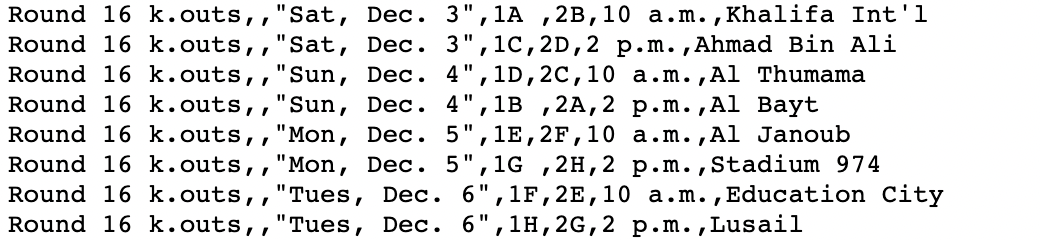

In [ ]:
# Lista de partidos en los 16avos de final
grupos_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('France', 'Mexico'),
            ('England', 'Senegal'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Belgium', 'Germany'),
            ('Portugal', 'Switzerland')]

###B. 16avos de Final

In [ ]:
backup_pred_set.head()

torneo equipo_local equipo_visitante equipo_ganador
0       1  Netherlands          Senegal           None
1       1      Ecuador            Qatar           None
2       1      IR Iran          England           None
3       1        Wales              USA           None
4       1    Argentina     Saudi Arabia           None

In [ ]:
def limpiar_y_predecir(partidos, ranking_fifa, final, logreg):

    # Initialization of auxiliary list for data cleaning
    # Inicialización de lista auxiliar para limpieza de datos
    posiciones = []

    # Loop to retrieve each team's position according to FIFA ranking
    #Bucle para recuperar la posición de cada equipo según el ranking FIFA
    for partido in partidos:
        posiciones.append(ranking_fifa.loc[ranking_fifa['equipo'] == partido[0],'posicion'].iloc[0])
        posiciones.append(ranking_fifa.loc[ranking_fifa['equipo'] == partido[1],'posicion'].iloc[0])
    #print(posiciones)
    # Creating the DataFrame for prediction
    # Creamos el dataframe de las predicciones
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(posiciones):
        dict1 = {}
        # If position of first team is better, he will be the 'home' team, and vice-versa
        if posiciones[i] < posiciones[i + 1]:
             #dict1.update({"torneo":1,"diferencia_goles":0.242359',equipo_local': partidos[j][0], 'equipo_visitante': partidos[j][1]})
            dict1.update({"torneo":1,'equipo_local': partidos[j][0], 'equipo_visitante': partidos[j][1]})
        else:
            dict1.update({"torneo":1,'equipo_local': partidos[j][1], 'equipo_visitante': partidos[j][0]})

           # dict1.update({"torneo":1,"diferencia_goles":0.242359,'equipo_local': partidos[j][1], 'equipo_visitante': partidos[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    #print(pred_set)

    # Convert list into DataFrame
    # Convertimos la lista en dataframe
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set


    # Get dummy variables
    # Obtenemos el dummy de las variables
    pred_set = pd.get_dummies(pred_set, prefix=['equipo_local', 'equipo_visitante'], columns=['equipo_local', 'equipo_visitante'])

    # Add missing columns compared to the model's training dataset
    # Añadimos a aquelllos que no participarán en el mundial, pero con valores 0. Es decir, no jugarán ningun partido
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    # Eliminamos la columna del equipo ganador
    pred_set = pred_set.drop(['equipo_ganador'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 2])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 2])
        print('La probabilidad de que ' + backup_pred_set.iloc[i, 1] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('La probabilidad de que  Empate: ', '{}'.format(round(logreg.predict_proba(pred_set)[i][1],10)))
        print('La probabilidad de que ' + backup_pred_set.iloc[i, 2] + ' Gane: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")


In [ ]:
limpiar_y_predecir(grupos_16,ranking_clasificados,final,logreg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Netherlands and Wales
Winner: Netherlands
La probabilidad de que Netherlands Gane:  0.604
La probabilidad de que  Empate:  0.2590346389
La probabilidad de que Wales Gane:  0.137

Argentina and Denmark
Winner: Argentina
La probabilidad de que Argentina Gane:  0.728
La probabilidad de que  Empate:  0.1776034269
La probabilidad de que Denmark Gane:  0.094

France and Mexico
Winner: France
La probabilidad de que France Gane:  0.547
La probabilidad de que  Empate:  0.232461303
La probabilidad de que Mexico Gane:  0.221

England and Senegal
Winner: England
La probabilidad de que England Gane:  0.722
La probabilidad de que  Empate:  0.1942488401
La probabilidad de que Senegal Gane:  0.084

Spain and Croatia
Winner: Spain
La probabilidad de que Spain Gane:  0.592
La probabilidad de que  Empate:  0.2669973073
La probabilidad de que Croatia Gane:  0.141

Brazil and Uruguay
Winner: Brazil
La probabilidad de que Brazil Gane:  0.671
La probabilidad de que  Empate:  0.1831941749
La probabilidad de q

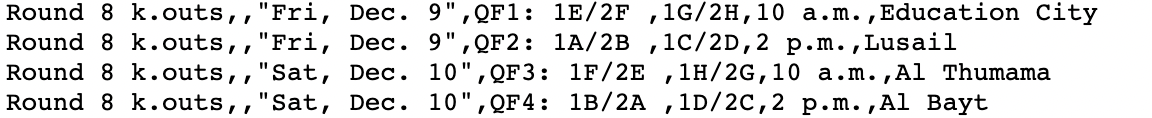

###C. Cuartos de Final

In [ ]:
#Lista de Partidos
cuartos_final = [('Spain', 'Brazil'),
            ('Netherlands', 'Argentina'),
            ('Germany', 'Portugal'),
            ('England', 'France')]

In [ ]:
limpiar_y_predecir(cuartos_final,ranking_clasificados,final,logreg)

Brazil and Spain
Winner: Brazil
La probabilidad de que Brazil Gane:  0.517
La probabilidad de que  Empate:  0.264303035
La probabilidad de que Spain Gane:  0.219

Argentina and Netherlands
Winner: Argentina
La probabilidad de que Argentina Gane:  0.553
La probabilidad de que  Empate:  0.3001141645
La probabilidad de que Netherlands Gane:  0.147

Portugal and Germany
Winner: Germany
La probabilidad de que Portugal Gane:  0.285
La probabilidad de que  Empate:  0.2799952499
La probabilidad de que Germany Gane:  0.435

France and England
Winner: England
La probabilidad de que France Gane:  0.321
La probabilidad de que  Empate:  0.2751205463
La probabilidad de que England Gane:  0.404



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



###D. Semifinal

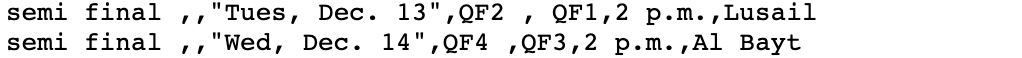

In [ ]:
# Lista de Partidos
semifinal = [('Argentina', 'Brazil'),
        ('England', 'Germany')]

In [ ]:
limpiar_y_predecir(semifinal,ranking_clasificados,final,logreg)

Brazil and Argentina
Winner: Brazil
La probabilidad de que Brazil Gane:  0.591
La probabilidad de que  Empate:  0.2217333678
La probabilidad de que Argentina Gane:  0.187

England and Germany
Winner: England
La probabilidad de que England Gane:  0.394
La probabilidad de que  Empate:  0.2148820501
La probabilidad de que Germany Gane:  0.391



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



###E. Final

In [ ]:
finales = [('Brazil', 'England')]

In [ ]:
limpiar_y_predecir(finales,ranking_clasificados,final,logreg)

Brazil and England
Winner: Brazil
La probabilidad de que Brazil Gane:  0.489
La probabilidad de que  Empate:  0.2714463289
La probabilidad de que England Gane:  0.239



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



# 6.- GRACIAS

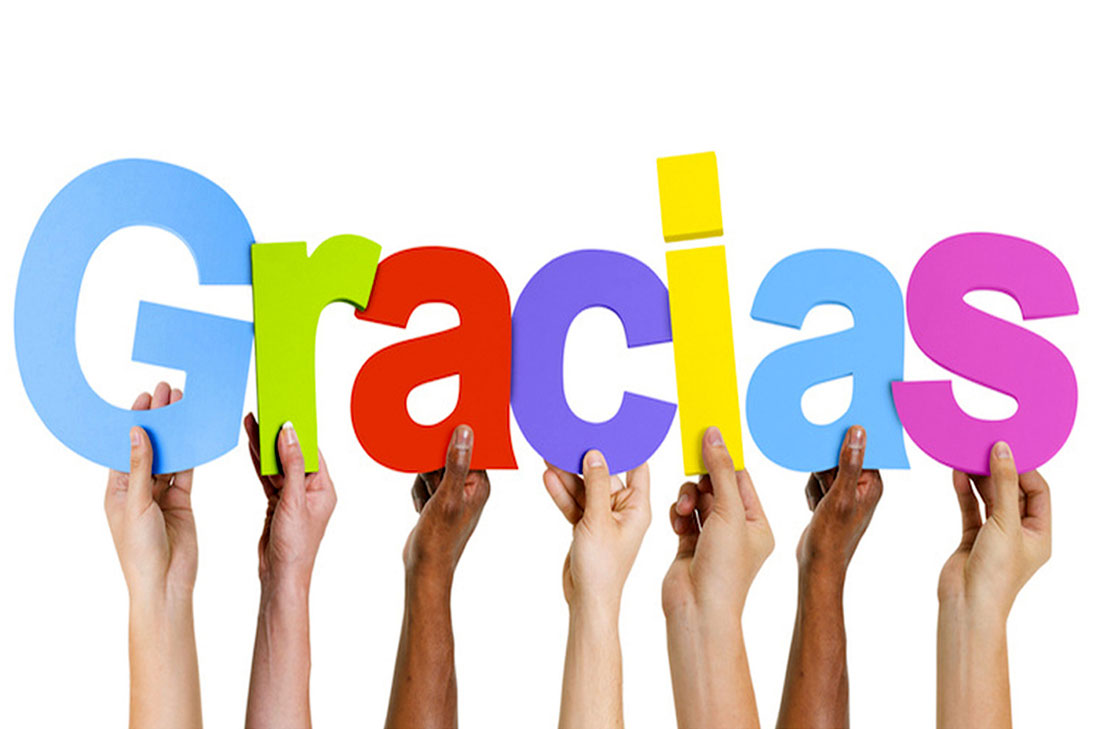